In [252]:
import pandas as pd
data=pd.read_csv(r"C:\Users\PC\Desktop\mediacomproject\cleaned ad dataset.csv")

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              9462 non-null   int64  
 1   GENDER           9462 non-null   object 
 2   INCOME           9462 non-null   float64
 3   LOCATION         9462 non-null   object 
 4   AD_TYPE          9462 non-null   object 
 5   AD_TOPIC         9462 non-null   object 
 6   AD_PLACEMENT     9462 non-null   object 
 7   CLICKS           9462 non-null   int64  
 8   CONVERSION_RATE  9462 non-null   float64
 9   CTR              9462 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 739.3+ KB


## Handling Logical Inconsistencies in CTR and Conversion Rate

In [254]:
data[(data['CLICKS']==0) & (data['CONVERSION_RATE']>0)].shape[0]|data[(data['CLICKS']==0) & (data['CTR']>0)].shape[0]

79

In [255]:
data.loc[data['CLICKS'] == 0, 'CTR'] = 0

In [256]:
import numpy as np
data.loc[data['CLICKS'] == 0, 'CONVERSION_RATE'] = np.nan

In [257]:
data[(data['CLICKS']==0) & (data['CONVERSION_RATE']>0)].shape[0]|data[(data['CLICKS']==0) & (data['CTR']>0)].shape[0]

0

In [258]:
data.duplicated().sum()

0

In [259]:
data.isnull().sum()

AGE                 0
GENDER              0
INCOME              0
LOCATION            0
AD_TYPE             0
AD_TOPIC            0
AD_PLACEMENT        0
CLICKS              0
CONVERSION_RATE    78
CTR                 0
dtype: int64

In [260]:
data.describe()

,AGE,INCOME,CLICKS,CONVERSION_RATE,CTR
count,9462.000000,9462.000000,9462.000000,9384.000000,9462.000000
mean,35.920630,50153.130708,5.024202,0.202074,0.050012
std,13.302833,19775.709746,2.257343,0.121634,0.020334
min,11.000000,78.950000,0.000000,0.001000,0.000000
25%,26.000000,36739.490000,3.000000,0.108400,0.036600
50%,35.000000,50139.810000,5.000000,0.179900,0.050100
75%,45.000000,63231.372500,6.000000,0.275200,0.063700
max,92.000000,126635.800000,17.000000,0.731700,0.127200


## Deriving IMPRESSIONS Feature

In [261]:
def calc_impressions(data):
    impressions = np.where(data['CTR'] == 0, np.nan, data['CLICKS'] / data['CTR'])
    return impressions
data['IMPRESSIONS'] = calc_impressions(data)

In [262]:
data

,AGE,GENDER,INCOME,LOCATION,AD_TYPE,AD_TOPIC,AD_PLACEMENT,CLICKS,CONVERSION_RATE,CTR,IMPRESSIONS
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,0.0981,0.0737,40.705563
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,0.0937,0.0592,84.459459
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,0.1912,0.0563,71.047957
3,68,Female,64585.73,Suburban,Text,Health,Website,6,0.1122,0.0232,258.620690
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,0.1426,0.0539,92.764378
...,...,...,...,...,...,...,...,...,...,...,...
9457,49,Female,72810.17,Rural,Banner,Technology,Website,9,0.0679,0.0443,203.160271
9458,35,Male,42182.75,Urban,Native,Technology,Website,9,0.2664,0.0407,221.130221
9459,42,Male,55084.12,Suburban,Text,Finance,Search Engine,3,0.2354,0.0390,76.923077
9460,34,Male,39382.80,Rural,Native,Technology,Social Media,4,0.1725,0.0455,87.912088


# EDA

## UNIVARIATE ANALYSIS

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


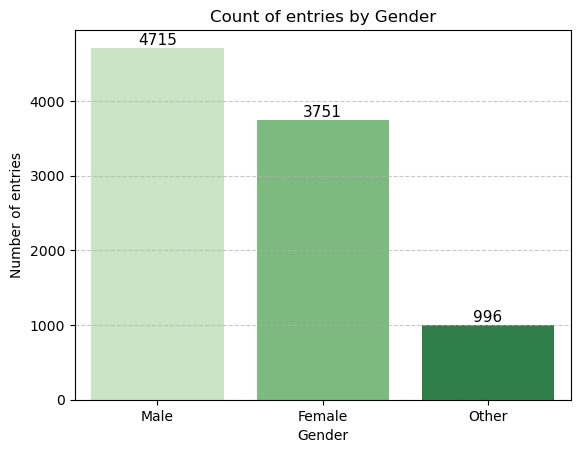

In [264]:
gp = sns.countplot(x='GENDER', data=data, palette='Greens',hue='GENDER')
# Add count labels on top of each bar
for p in gp.patches:
    height = p.get_height()
    gp.text(p.get_x() + p.get_width() / 2, height + 5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=11)

plt.title("Count of entries by Gender")
plt.xlabel('Gender')
plt.ylabel('Number of entries')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Text(0.5, 1.0, 'AGE DISRTIUTION')

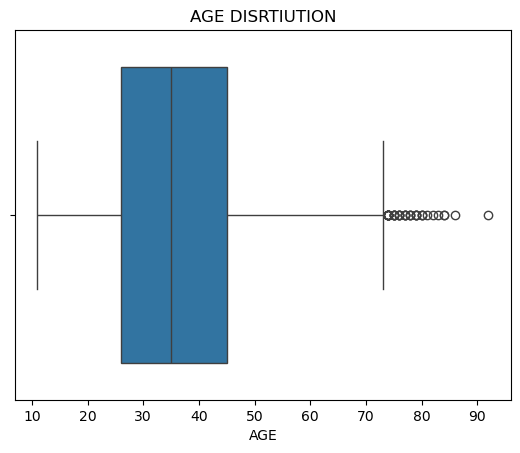

In [265]:
sns.boxplot(x=data['AGE'])
plt.title("AGE DISRTIUTION")

In [266]:
age_q1=data['AGE'].quantile(0.25)
age_q3=data['AGE'].quantile(0.75)
iqr_age=age_q3-age_q1
age_upper_bound=age_q3+1.5*iqr_age

In [267]:
age_outliers=data['AGE']>age_upper_bound
age_outliers.sum()

43

In [268]:
bins=[10,20,30,50,70,100]
labels=['Teen','Young Adult','Adult','Old Adult','Old Age']
data['Age_class']=pd.cut(data['AGE'],bins=bins,labels=labels,right=False)

In [269]:
data

,AGE,GENDER,INCOME,LOCATION,AD_TYPE,AD_TOPIC,AD_PLACEMENT,CLICKS,CONVERSION_RATE,CTR,IMPRESSIONS,Age_class
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,0.0981,0.0737,40.705563,Old Adult
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,0.0937,0.0592,84.459459,Adult
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,0.1912,0.0563,71.047957,Adult
3,68,Female,64585.73,Suburban,Text,Health,Website,6,0.1122,0.0232,258.620690,Old Adult
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,0.1426,0.0539,92.764378,Old Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
9457,49,Female,72810.17,Rural,Banner,Technology,Website,9,0.0679,0.0443,203.160271,Adult
9458,35,Male,42182.75,Urban,Native,Technology,Website,9,0.2664,0.0407,221.130221,Adult
9459,42,Male,55084.12,Suburban,Text,Finance,Search Engine,3,0.2354,0.0390,76.923077,Adult
9460,34,Male,39382.80,Rural,Native,Technology,Social Media,4,0.1725,0.0455,87.912088,Adult


Text(0.5, 1.0, 'Count of entries by Age_class ')

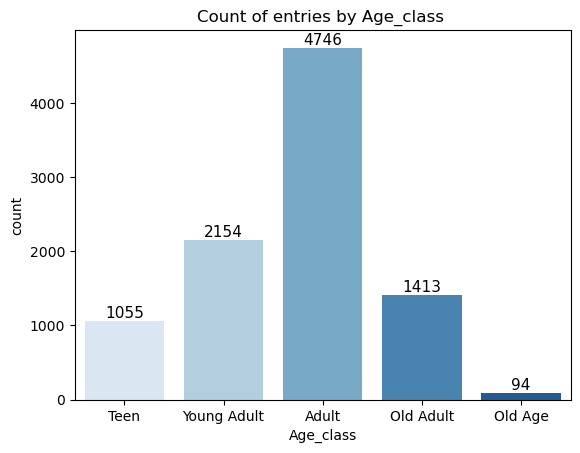

In [270]:
ap=sns.countplot(x='Age_class',data=data, palette='Blues',hue='Age_class')
for p in ap.patches:
    height = p.get_height()
    ap.text(p.get_x() + p.get_width() / 2, height + 5, f'{int(height)}', 
            ha='center', va='bottom', fontsize=11)
plt.title("Count of entries by Age_class ")

Text(0.5, 1.0, 'INCOME DISRTIUTION')

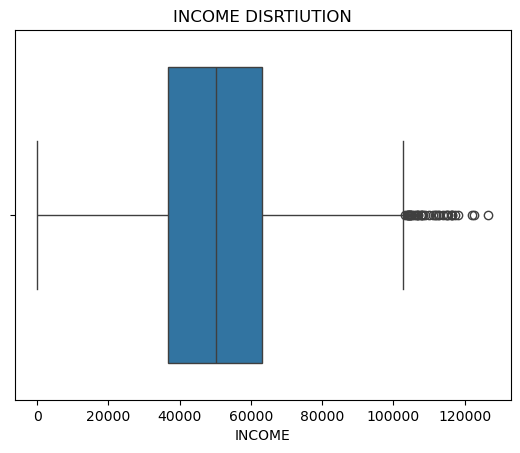

In [271]:
sns.boxplot(x=data['INCOME'])
plt.title("INCOME DISRTIUTION")

In [272]:
income_q1=data['INCOME'].quantile(0.25)
income_q3=data['INCOME'].quantile(0.75)
print("first quartile=",income_q1,"third quartile=",income_q3)
iqr=income_q3-income_q1
print("IQR =",iqr)
lower_bound_income=income_q1-(1.5*iqr)
upper_bound_income=income_q3+(1.5*iqr)
print("Outlier thresholds:",lower_bound_income, "to",upper_bound_income)

first quartile= 36739.49 third quartile= 63231.3725
IQR = 26491.8825
Outlier thresholds: -2998.333749999998 to 102969.19625


In [273]:
Outliers=data['INCOME']>upper_bound_income
Outliers.sum()

39

In [274]:
min_income=data['INCOME'].min()
max_income=data['INCOME'].max()

In [275]:
bins=[min_income,income_q1,income_q3,max_income]
labels=['Low','Medium','High']
data['Income_class']=pd.cut(data['INCOME'],bins=bins,labels=labels,include_lowest=True,right=True)

In [276]:
data['Income_class'].value_counts()

Income_class
Medium    4730
Low       2366
High      2366
Name: count, dtype: int64

Text(0.5, 1.0, 'CLICKS DISRTIUTION')

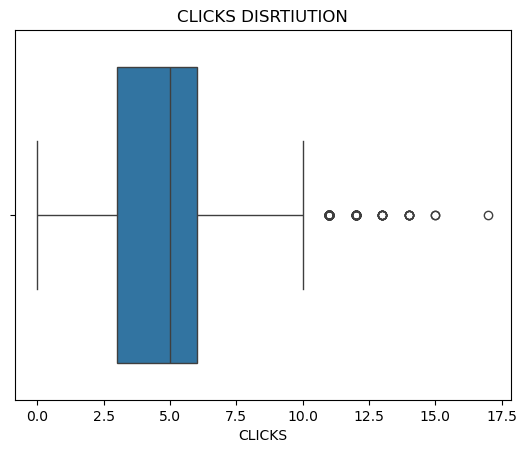

In [277]:
sns.boxplot(x=data['CLICKS'])
plt.title("CLICKS DISRTIUTION")

In [278]:
cli_q1=data['CLICKS'].quantile(0.25)
cli_q3=data['CLICKS'].quantile(0.75)
iqr_cli=age_q3-cli_q1
cli_upper_bound=cli_q3+1.5*iqr_cli

In [279]:
cli_outliers=data['CLICKS']>cli_upper_bound
cli_outliers.sum()

0

Text(0.5, 1.0, 'Distribution of Click-Through Rate\xa0(CTR)')

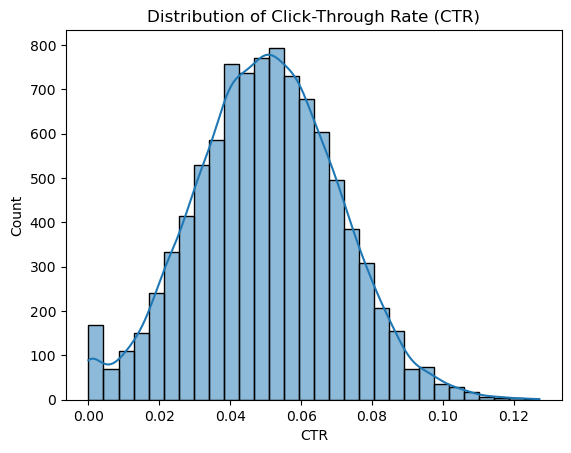

In [280]:
sns.histplot(data['CTR'],bins=30,kde=True)
plt.title("Distribution of Click-Through Rate (CTR)")

- The CTR values mostly lie between about 0 and 0.1 (0% to 10%), with a peak around 0.04 to 0.06.
- The distribution is roughly bell-shaped but slightly skewed towards lower CTR values.
- Most ads get low to moderate CTR, with very few ads having high CTR (close to 0.12).
- This is typical in advertising data where a small fraction of ads perform very well, and most have modest engagement.

Text(0.5, 1.0, 'Distribution of CONVERSION_RATE')

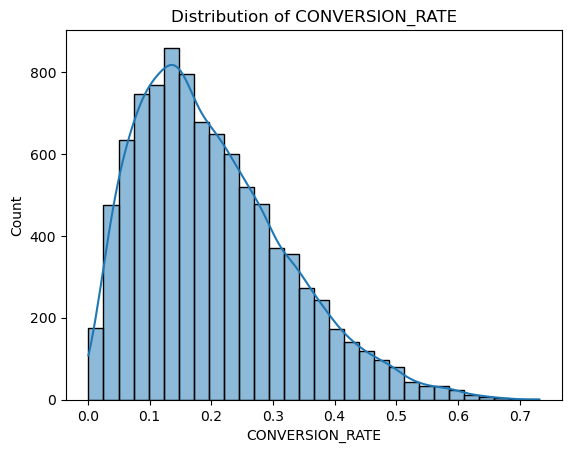

In [281]:
sns.histplot(data['CONVERSION_RATE'],bins=30,kde=True)
plt.title("Distribution of CONVERSION_RATE")

* The CONVERSION RATES Evalues mostly lie between about 0 and 0.4 (0% to 4%)with a peak around 0.1 to 0.2.
* The distribution is roughly bell-shaped but heavily skewed towards lower CONVERSION RATES.
* Most ads get low to moderate CONVERSION RATES, with very few ads having high CONVERSION RATES (close to 0.12).
* This is typical in advertising data where a small fraction of ads perform very well, and most have modest engagement.

Text(0.5, 1.0, 'Distribution of IMPRESSIONS')

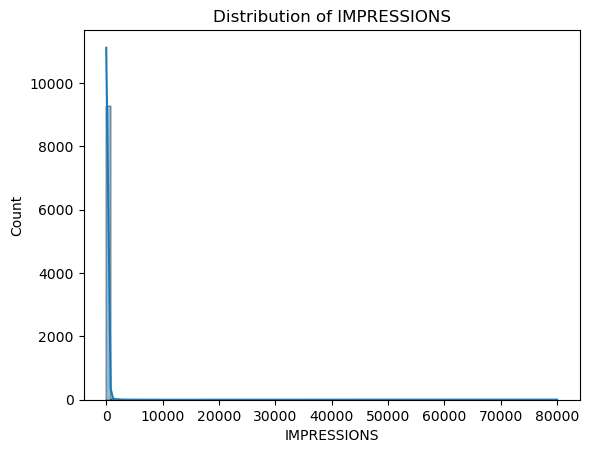

In [282]:
sns.histplot(data['IMPRESSIONS'],bins=100,kde=True)
plt.title("Distribution of IMPRESSIONS")

## BIVARIATE ANALYSIS  

<Axes: xlabel='CTR', ylabel='CONVERSION_RATE'>

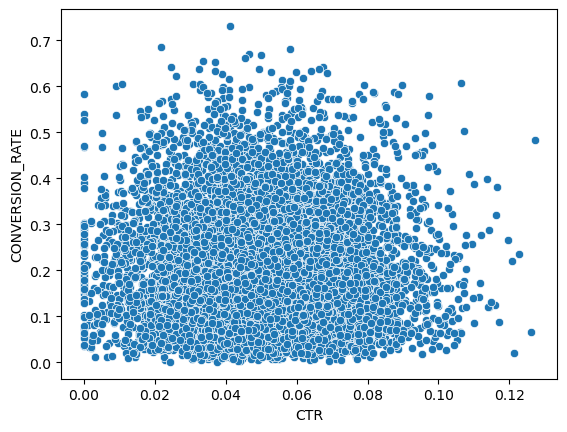

In [283]:
sns.scatterplot(x='CTR',y='CONVERSION_RATE',data=data)

* Upward slope implies Good: More clicks = More conversions  
* Flat/Downward slope mean Bad: Clicks don't lead to sales  
* Ads in the top-right (high CTR + high conversion) are good performing ads
* Ads in the bottom-right (high CTR + low conversion) are bad performing ads
* Ads in top left (Low CTR + high conversion) are high-quality, targeted audience ads (Fewer clicks, but those who click convert)

<Axes: >

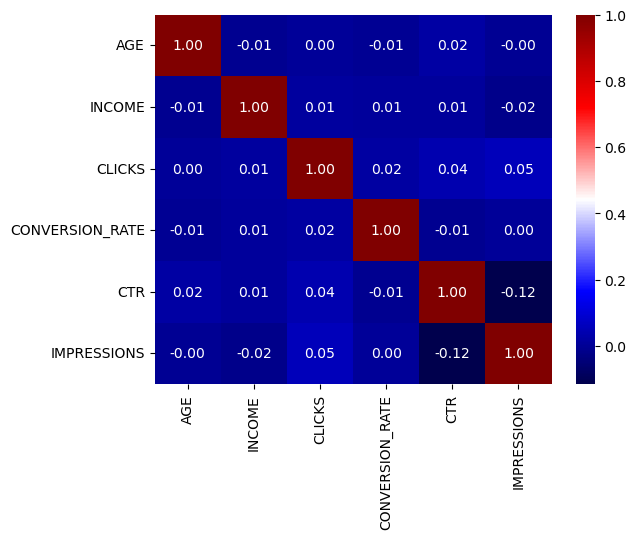

In [284]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='seismic')

* No multicollinearity problem
* No obvious feature pair relationship

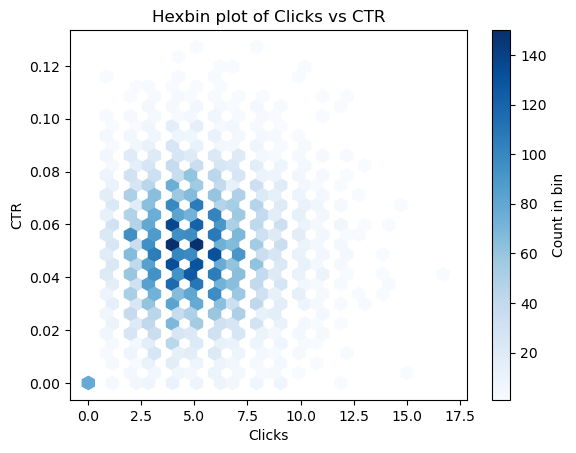

In [285]:
plt.hexbin(data['CLICKS'], data['CTR'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.xlabel('Clicks')
plt.ylabel('CTR')
plt.title('Hexbin plot of Clicks vs CTR')
plt.show()

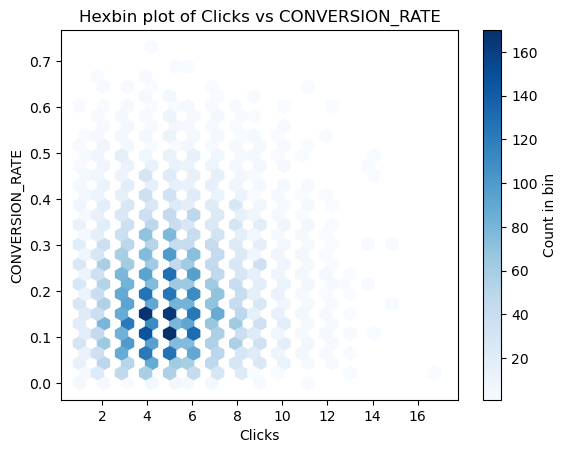

In [286]:
plt.hexbin(data['CLICKS'], data['CONVERSION_RATE'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in bin')
plt.xlabel('Clicks')
plt.ylabel('CONVERSION_RATE')
plt.title('Hexbin plot of Clicks vs CONVERSION_RATE')
plt.show()

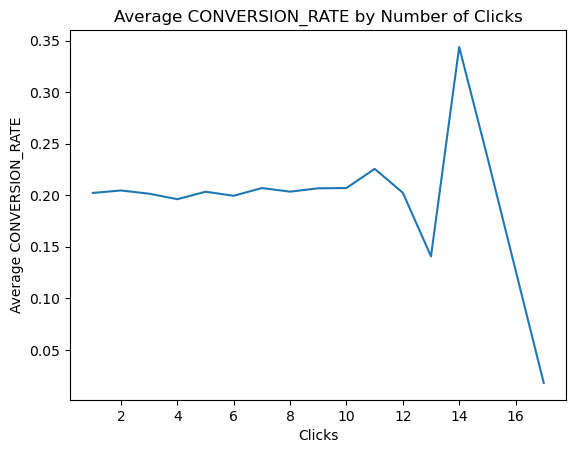

In [287]:
mean_ctr_by_clicks = data.groupby('CLICKS')['CONVERSION_RATE'].mean()
mean_ctr_by_clicks.plot(kind='line')
plt.xlabel('Clicks')
plt.ylabel('Average CONVERSION_RATE')
plt.title('Average CONVERSION_RATE by Number of Clicks')
plt.show()

* The conversion rate is not consistently increasing or decreasing with the number of clicks.

* There may be some optimal range of clicks where conversion rate is higher, but it’s noisy and irregular.

* Possibly, after some clicks, users lose interest or the effect of additional clicks diminishes.

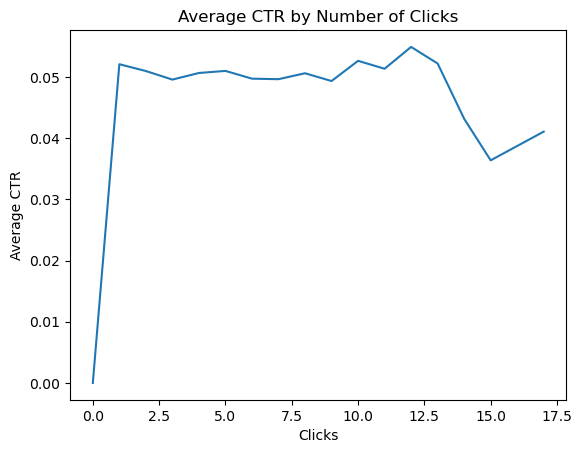

In [288]:
mean_ctr_by_clicks = data.groupby('CLICKS')['CTR'].mean()
mean_ctr_by_clicks.plot(kind='line')
plt.xlabel('Clicks')
plt.ylabel('Average CTR')
plt.title('Average CTR by Number of Clicks')
plt.show()

* After the initial users, engagement spreads across a broader audience, so CTR is slightly lower but not drastically.
* Users with many clicks may be less responsive to new ads, possibly oversaturation or lower relevance.

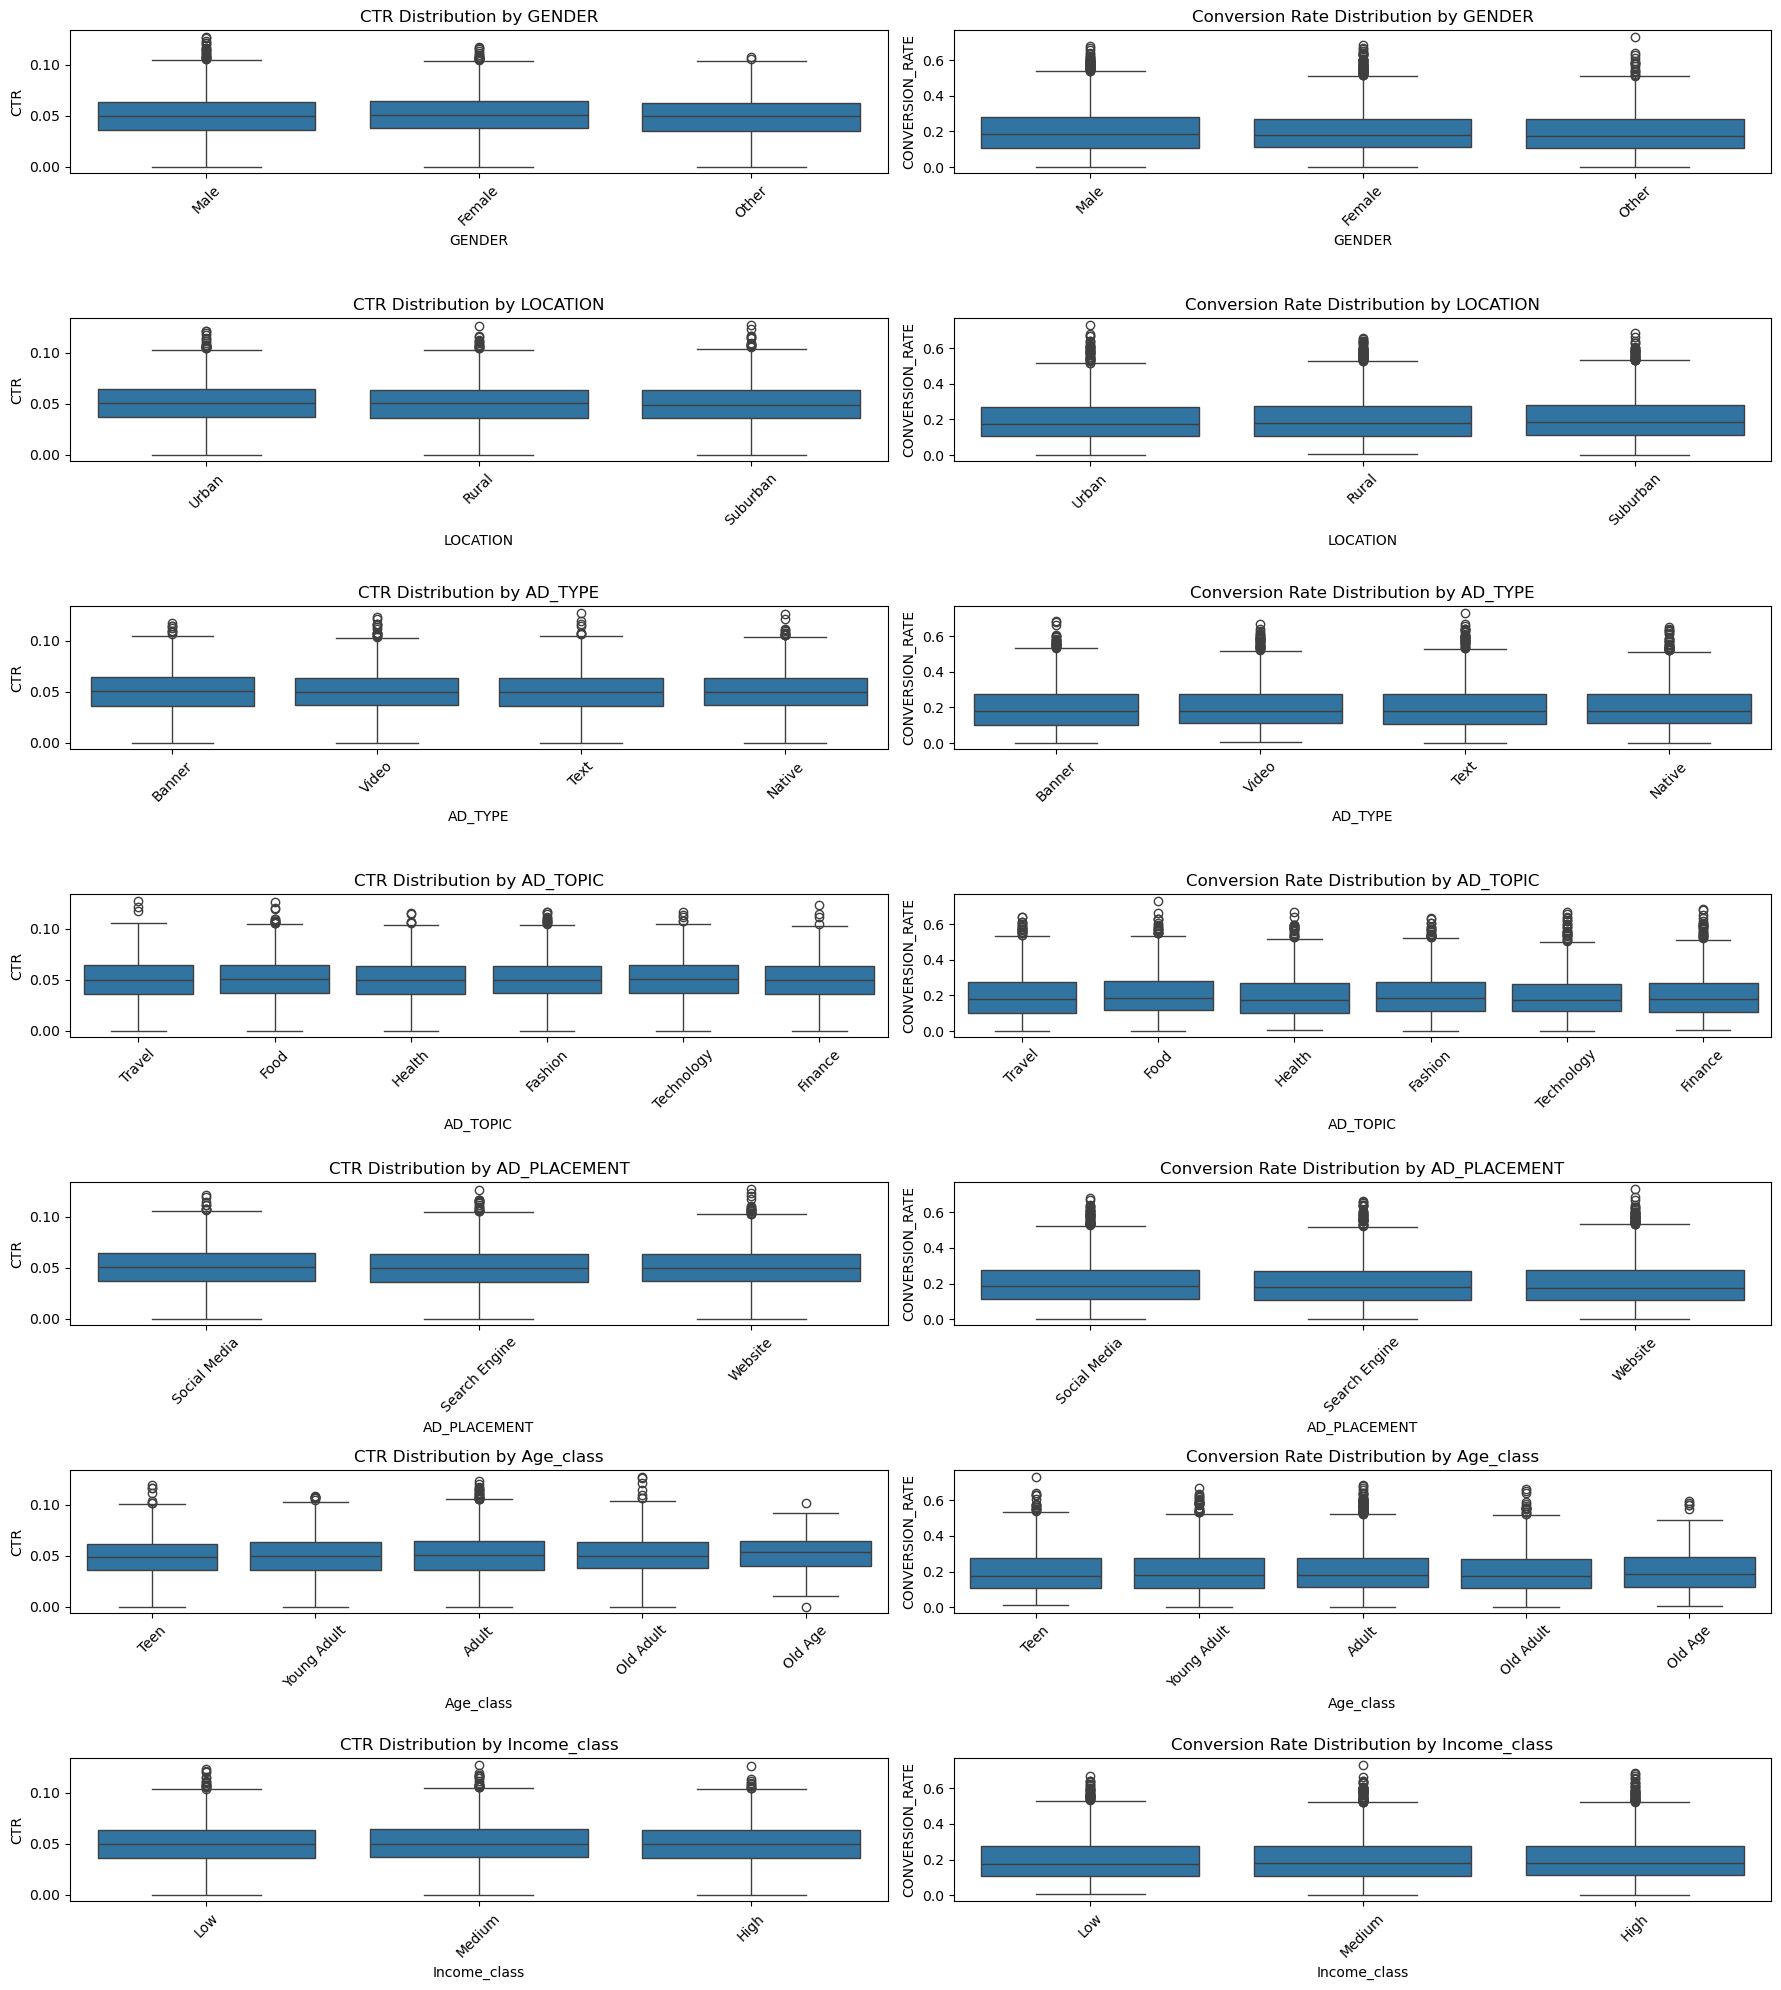

In [289]:
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()
plt.figure(figsize=(18,20))
for i, cat_var in enumerate(categorical_vars, 1):
    # Left column
    plt.subplot(len(categorical_vars), 2, 2*i - 1)  
    sns.boxplot(x=cat_var, y='CTR', data=data)
    plt.title(f'CTR Distribution by {cat_var}')
    plt.xticks(rotation=45)  
    # Right column
    plt.subplot(len(categorical_vars), 2, 2*i)  
    sns.boxplot(x=cat_var, y='CONVERSION_RATE',data=data)
    plt.title(f'Conversion Rate Distribution by {cat_var}')
    plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

# FEATURE ENGINEERING

In [290]:
data.head()

,AGE,GENDER,INCOME,LOCATION,AD_TYPE,AD_TOPIC,AD_PLACEMENT,CLICKS,CONVERSION_RATE,CTR,IMPRESSIONS,Age_class,Income_class
0,61,Male,35717.43,Urban,Banner,Travel,Social Media,3,0.0981,0.0737,40.705563,Old Adult,Low
1,41,Male,47453.25,Rural,Video,Travel,Search Engine,5,0.0937,0.0592,84.459459,Adult,Medium
2,49,Female,68126.35,Rural,Text,Food,Social Media,4,0.1912,0.0563,71.047957,Adult,High
3,68,Female,64585.73,Suburban,Text,Health,Website,6,0.1122,0.0232,258.620690,Old Adult,High
4,63,Male,21109.40,Urban,Native,Fashion,Search Engine,5,0.1426,0.0539,92.764378,Old Adult,Low


## ENCODING CATEGORICAL VARIABLES

In [291]:
df=data.copy()
cat_var = df.select_dtypes(include=['object', 'category']).columns.tolist()
cat_var.remove('Age_class')
cat_var.remove('Income_class')

In [292]:
df = pd.get_dummies(data, columns=cat_var, drop_first=False)

In [293]:
df

,AGE,INCOME,CLICKS,CONVERSION_RATE,CTR,IMPRESSIONS,Age_class,Income_class,GENDER_Female,GENDER_Male,...,AD_TYPE_Video,AD_TOPIC_Fashion,AD_TOPIC_Finance,AD_TOPIC_Food,AD_TOPIC_Health,AD_TOPIC_Technology,AD_TOPIC_Travel,AD_PLACEMENT_Search Engine,AD_PLACEMENT_Social Media,AD_PLACEMENT_Website
0,61,35717.43,3,0.0981,0.0737,40.705563,Old Adult,Low,False,True,...,False,False,False,False,False,False,True,False,True,False
1,41,47453.25,5,0.0937,0.0592,84.459459,Adult,Medium,False,True,...,True,False,False,False,False,False,True,True,False,False
2,49,68126.35,4,0.1912,0.0563,71.047957,Adult,High,True,False,...,False,False,False,True,False,False,False,False,True,False
3,68,64585.73,6,0.1122,0.0232,258.620690,Old Adult,High,True,False,...,False,False,False,False,True,False,False,False,False,True
4,63,21109.40,5,0.1426,0.0539,92.764378,Old Adult,Low,False,True,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,49,72810.17,9,0.0679,0.0443,203.160271,Adult,High,True,False,...,False,False,False,False,False,True,False,False,False,True
9458,35,42182.75,9,0.2664,0.0407,221.130221,Adult,Medium,False,True,...,False,False,False,False,False,True,False,False,False,True
9459,42,55084.12,3,0.2354,0.0390,76.923077,Adult,Medium,False,True,...,False,False,True,False,False,False,False,True,False,False
9460,34,39382.80,4,0.1725,0.0455,87.912088,Adult,Medium,False,True,...,False,False,False,False,False,True,False,False,True,False


In [294]:
age_order = {
    'Teen': 0,
    'Young Adult': 1,
    'Adult': 2,
    'Old Adult': 3,
    'Old Age': 4
}

df['Age_class'] = df['Age_class'].map(age_order)

In [295]:
income_order = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
}

df['Income_class'] = df['Income_class'].map(income_order)

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9462 entries, 0 to 9461
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   AGE                         9462 non-null   int64   
 1   INCOME                      9462 non-null   float64 
 2   CLICKS                      9462 non-null   int64   
 3   CONVERSION_RATE             9384 non-null   float64 
 4   CTR                         9462 non-null   float64 
 5   IMPRESSIONS                 9331 non-null   float64 
 6   Age_class                   9462 non-null   category
 7   Income_class                9462 non-null   category
 8   GENDER_Female               9462 non-null   bool    
 9   GENDER_Male                 9462 non-null   bool    
 10  GENDER_Other                9462 non-null   bool    
 11  LOCATION_Rural              9462 non-null   bool    
 12  LOCATION_Suburban           9462 non-null   bool    
 13  LOCATION_Urban    

# CLUSTERING

## Data preparation for clustering


In [297]:
df_cluster=df[['Age_class','Income_class','GENDER_Female','GENDER_Male','LOCATION_Rural','LOCATION_Urban']]
df_cluster

,Age_class,Income_class,GENDER_Female,GENDER_Male,LOCATION_Rural,LOCATION_Urban
0,3,0,False,True,False,True
1,2,1,False,True,True,False
2,2,2,True,False,True,False
3,3,2,True,False,False,False
4,3,0,False,True,False,True
...,...,...,...,...,...,...
9457,2,2,True,False,True,False
9458,2,1,False,True,False,True
9459,2,1,False,True,False,False
9460,2,1,False,True,True,False


In [298]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df_cluster)
    score = silhouette_score(df_cluster, labels)
    silhouette_scores.append((k, score))

print(silhouette_scores)

[(2, 0.20292987684654618), (3, 0.2332775003506427), (4, 0.21334294242501453), (5, 0.2239044474881685), (6, 0.2302554615480559), (7, 0.2331392605857822), (8, 0.24085970779506763), (9, 0.24800980601653938)]


## Clustering users with KMeans

In [299]:
k = 5 
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster)
print(df_cluster['cluster'].value_counts())

cluster
1    2601
2    2280
3    1669
4    1563
0    1349
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2510531573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster'] = kmeans.fit_predict(df_cluster)


In [300]:
summary_tables = {}
for col in ['Income_class', 'Age_class', 'GENDER_Female', 'LOCATION_Rural', 'LOCATION_Urban']:
    pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)
    summary_tables[col] = pivot

for name, table in summary_tables.items():
    print(f"\n{name} per cluster:\n", table)


Income_class per cluster:
 Income_class    0     1     2
cluster                      
0               0   311  1038
1             715  1401   485
2             478  1284   518
3             774   895     0
4             399   839   325

Age_class per cluster:
 Age_class     0     1     2    3   4
cluster                             
0             0   227   937  169  16
1          1055  1546     0    0   0
2             0     0  1668  561  51
3             0     0  1199  443  27
4             0   381   942  240   0

GENDER_Female per cluster:
 GENDER_Female  False  True 
cluster                    
0                178   1171
1               1556   1045
2               2280      0
3                134   1535
4               1563      0

LOCATION_Rural per cluster:
 LOCATION_Rural  False  True 
cluster                     
0                 684    665
1                1972    629
2                2262     18
3                1336    333
4                   0   1563

LOCATION_Urban per 

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\1677156748.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\1677156748.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)


## Run K-Prototypes

In [301]:
from kmodes.kprototypes import KPrototypes

k = 4  # choose number of clusters

# Identify categorical column indices in your existing df_cluster
categorical_cols = ['GENDER_Female', 'GENDER_Male', 'LOCATION_Rural', 'LOCATION_Urban']
categorical_indices = [df_cluster.columns.get_loc(col) for col in categorical_cols]

# Fit K-Prototypes on your existing df_cluster (all columns included)
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=2, random_state=42)
clusters = kproto.fit_predict(df_cluster, categorical=categorical_indices)

# Assign cluster labels back
df_cluster['cluster']=clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 3971, ncost: 13691.921446948782
Run: 1, iteration: 2/100, moves: 570, ncost: 13417.836217801543
Run: 1, iteration: 3/100, moves: 1, ncost: 13417.832649354652
Run: 1, iteration: 4/100, moves: 0, ncost: 13417.832649354652
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 378, ncost: 14532.226745230671
Run: 2, iteration: 2/100, moves: 291, ncost: 14389.540652003072
Run: 2, iteration: 3/100, moves: 10, ncost: 14389.469285221505
Run: 2, iteration: 4/100, moves: 0, ncost: 14389.469285221505
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 2610, ncost: 13681.035176859028
Run: 3, iteration: 2/100, moves: 478, ncost: 13419.79681220331
Run: 3, iteration: 3/100, moves: 32, ncost: 13417.

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\981009693.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['cluster']=clusters


In [302]:
print(df_cluster['cluster'].value_counts())

cluster
1    3949
2    2601
0    1563
3    1349
Name: count, dtype: int64


In [303]:
print("Cost:", kproto.cost_)

Cost: 12603.745008187518


In [304]:
df_cluster['CTR'] = df['CTR'].values
df_cluster['CONVERSION_RATE '] = df['CONVERSION_RATE'].values

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\3523530626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['CTR'] = df['CTR'].values
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\3523530626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['CONVERSION_RATE '] = df['CONVERSION_RATE'].values


## Summary tables per demographic variable

In [305]:
summary_tables = {}
for col in ['Income_class', 'Age_class', 'GENDER_Female', 'LOCATION_Rural', 'LOCATION_Urban']:
    pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)
    summary_tables[col] = pivot
for name, table in summary_tables.items():
    print(f"\n{name} per cluster:\n", table)


Income_class per cluster:
 Income_class     0     1     2
cluster                       
0              399   839   325
1             1252  2179   518
2              715  1401   485
3                0   311  1038

Age_class per cluster:
 Age_class     0     1     2     3   4
cluster                              
0             0   381   942   240   0
1             0     0  2867  1004  78
2          1055  1546     0     0   0
3             0   227   937   169  16

GENDER_Female per cluster:
 GENDER_Female  False  True 
cluster                    
0               1563      0
1               2414   1535
2               1556   1045
3                178   1171

LOCATION_Rural per cluster:
 LOCATION_Rural  False  True 
cluster                     
0                   0   1563
1                3598    351
2                1972    629
3                 684    665

LOCATION_Urban per cluster:
 LOCATION_Urban  False  True 
cluster                     
0                1563      0
1              

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2897484901.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2897484901.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_cluster.pivot_table(index='cluster', columns=col, aggfunc='size', fill_value=0)


* Cluster 0: Younger, mid/high-income females, evenly split rural/non-rural, mostly non-urban.

* Cluster 1: Mostly female, low/mid-income, middle-aged, suburban/urban leaning.

* Cluster 2: Male, younger/mid-aged, mixed income, balanced urban/non-urban.

* Cluster 3: Rural males, low/mid-income, young/mid-aged, entirely non-urban.

* Cluster 4: Very young, mid-income, mixed gender, mostly urban.

## Summary tables per CTR_level

In [306]:
summary_tables = {}
ctr_threshold = df_cluster['CTR'].median() 
df_cluster['CTR_level'] = df_cluster['CTR'].apply(lambda x: 'High' if x >= ctr_threshold else 'Low')

for col in ['Income_class', 'Age_class', 'GENDER_Female', 'LOCATION_Rural', 'LOCATION_Urban']:
    pivot = pd.pivot_table(
        df_cluster,
        index='cluster',
        columns=[col, 'CTR_level'],
        aggfunc='size',
        fill_value=0
    )
    summary_tables[col] = pivot

# Display all summary tables
for name, table in summary_tables.items():
    print(f"\n{name} per cluster with High/Low CTR counts:\n", table)

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2800009127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['CTR_level'] = df_cluster['CTR'].apply(lambda x: 'High' if x >= ctr_threshold else 'Low')
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2800009127.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\2800009127.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain


Income_class per cluster with High/Low CTR counts:
 Income_class    0          1          2     
CTR_level    High  Low  High   Low High  Low
cluster                                     
0             200  199   428   411  155  170
1             630  622  1072  1107  263  255
2             339  376   705   696  220  265
3               0    0   178   133  547  491

Age_class per cluster with High/Low CTR counts:
 Age_class    0         1          2          3         4    
CTR_level High  Low High  Low  High   Low High  Low High Low
cluster                                                     
0            0    0  174  207   493   449  116  124    0   0
1            0    0    0    0  1429  1438  493  511   43  35
2          504  551  760  786     0     0    0    0    0   0
3            0    0  119  108   505   432   93   76    8   8

GENDER_Female per cluster with High/Low CTR counts:
 GENDER_Female False       True      
CTR_level      High   Low  High  Low
cluster                    

* Cluster 0: Younger, mid/high-income females, evenly split rural/non-rural, mostly non-urban.=>balanced CTR performance.

* Cluster 1: Mostly female, low/mid-income, middle-aged, suburban/urban leaning.=>  moderate CTR.

* Cluster 2: Male, younger/mid-aged, mixed income, balanced urban/non-urban.=>low/high CTR split.

* Cluster 3: Rural males, low/mid-income, young/mid-aged, entirely non-urban.=>moderate CTR.

* Cluster 4: Very young, mid-income, mixed gender, mostly urban.=>strong CTR

## Analyze Preferences for Each Cluster

In [307]:
df_cluster['AD_TYPE']=data['AD_TYPE'].values
df_cluster['AD_TOPIC']=data['AD_TOPIC'].values
df_cluster['AD_PLACEMENT']=data['AD_PLACEMENT'].values

C:\Users\PC\AppData\Local\Temp\ipykernel_8336\3580650882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['AD_TYPE']=data['AD_TYPE'].values
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\3580650882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['AD_TOPIC']=data['AD_TOPIC'].values
C:\Users\PC\AppData\Local\Temp\ipykernel_8336\3580650882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [308]:
df_cluster

,Age_class,Income_class,GENDER_Female,GENDER_Male,LOCATION_Rural,LOCATION_Urban,cluster,CTR,CONVERSION_RATE,CTR_level,AD_TYPE,AD_TOPIC,AD_PLACEMENT
0,3,0,False,True,False,True,1,0.0737,0.0981,High,Banner,Travel,Social Media
1,2,1,False,True,True,False,0,0.0592,0.0937,High,Video,Travel,Search Engine
2,2,2,True,False,True,False,3,0.0563,0.1912,High,Text,Food,Social Media
3,3,2,True,False,False,False,3,0.0232,0.1122,Low,Text,Health,Website
4,3,0,False,True,False,True,1,0.0539,0.1426,High,Native,Fashion,Search Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,2,2,True,False,True,False,3,0.0443,0.0679,Low,Banner,Technology,Website
9458,2,1,False,True,False,True,1,0.0407,0.2664,Low,Native,Technology,Website
9459,2,1,False,True,False,False,1,0.0390,0.2354,Low,Text,Finance,Search Engine
9460,2,1,False,True,True,False,0,0.0455,0.1725,Low,Native,Technology,Social Media


In [309]:
df_cluster.groupby('cluster').size()

cluster
0    1563
1    3949
2    2601
3    1349
dtype: int64

In [310]:
ad_features = df[
    [col for col in df.columns 
     if col.startswith('AD_TYPE_') or col.startswith('AD_TOPIC_') or col.startswith('AD_PLACEMENT_')]]

In [311]:
ad_features = pd.concat([
    ad_features,
    df[['CTR', 'CONVERSION_RATE']]
], axis=1)

In [312]:
ad_features = ad_features.fillna(0)

In [313]:
X = df[['CTR', 'CONVERSION_RATE']].copy()
X = X.dropna()

best_score = -1
best_k = None
best_model = None

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette score={score:.4f}")
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = model

print(f"Best k: {best_k} with silhouette score: {best_score:.4f}")

df.loc[X.index, 'CLUSTER'] = best_model.predict(X)

k=2, silhouette score=0.5697
k=3, silhouette score=0.5094
k=4, silhouette score=0.4693
k=5, silhouette score=0.4439
k=6, silhouette score=0.4133
k=7, silhouette score=0.3841
k=8, silhouette score=0.3793
k=9, silhouette score=0.3508
k=10, silhouette score=0.3440
Best k: 2 with silhouette score: 0.5697


In [314]:
from sklearn.cluster import KMeans

k_ads = 2  
kmeans_ads = KMeans(n_clusters=k_ads, random_state=42)
df['ad_cluster'] = kmeans_ads.fit_predict(ad_features)

In [315]:
ad_cluster_summary = df.groupby('ad_cluster')[['CTR', 'CONVERSION_RATE']].mean()
print(ad_cluster_summary)
for c in range(k_ads):
    print(f"\nAd Cluster {c} composition:")
    print(df[df['ad_cluster'] == c][[col for col in df.columns if col.startswith('AD_TYPE_')]].sum())
    print(df[df['ad_cluster'] == c][[col for col in df.columns if col.startswith('AD_TOPIC_')]].sum())
    print(df[df['ad_cluster'] == c][[col for col in df.columns if col.startswith('AD_PLACEMENT_')]].sum())

                 CTR  CONVERSION_RATE
ad_cluster                           
0           0.050225         0.204646
1           0.049906         0.200792

Ad Cluster 0 composition:
AD_TYPE_Banner    798
AD_TYPE_Native    789
AD_TYPE_Text      763
AD_TYPE_Video     799
dtype: int64
AD_TOPIC_Fashion       539
AD_TOPIC_Finance       535
AD_TOPIC_Food          536
AD_TOPIC_Health        519
AD_TOPIC_Technology    536
AD_TOPIC_Travel        484
dtype: int64
AD_PLACEMENT_Search Engine       0
AD_PLACEMENT_Social Media     3149
AD_PLACEMENT_Website             0
dtype: int64

Ad Cluster 1 composition:
AD_TYPE_Banner    1642
AD_TYPE_Native    1518
AD_TYPE_Text      1572
AD_TYPE_Video     1581
dtype: int64
AD_TOPIC_Fashion       1040
AD_TOPIC_Finance       1089
AD_TOPIC_Food          1031
AD_TOPIC_Health        1019
AD_TOPIC_Technology    1045
AD_TOPIC_Travel        1089
dtype: int64
AD_PLACEMENT_Search Engine    3145
AD_PLACEMENT_Social Media        0
AD_PLACEMENT_Website          3168
dtype: in

* Ad Cluster 0: Social media ads only, balanced ad types/topics, CTR ~ 0.0502, highest conversion rate (~ 20.46%).
* Ad Cluster 1: Search engine + website ads only, balanced ad types/topics, CTR ~ 0.0499, slightly lower conversion rate (~ 20.08%).

# Key Takeaways From Clustering

* Social media ads are the most effective overall, especially for young, urban, or mid-income audiences.

* Ad type and topic matter less than placement for CTR and conversion in your dataset.

* Demographic targeting is critical: match ad placement to user cluster characteristics.

* Search engine + website ads are slightly less effective, but still viable for middle-aged or rural users.

#####  High CTR & Conversion:

* User Cluster 4: Very young, mid-income, mixed gender, mostly urban.

* Ad Cluster 0: Social media placement, all ad types/topics balanced.

* Insight: Young urban users respond best to social media ads, regardless of ad type or topic.

# Count outliers using IQR per category

In [316]:
categorical_vars = data.select_dtypes(include=['object', 'category']).columns.tolist()
def outliers_by_category(df, cat_vars, num_vars):
    results = []
    for cat in cat_vars:
        for num in num_vars:
            for category in df[cat].dropna().unique():
                subset = df[df[cat] == category][num]
                if subset.empty:
                    continue
                Q1 = subset.quantile(0.25)
                Q3 = subset.quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                outlier_count = ((subset < lower_bound) | (subset > upper_bound)).sum()
                results.append({
                    'Category_Var': cat,
                    'Category': category,
                    'Numeric_Var': num,
                    'Outlier_Count': outlier_count,
                    'Total_Count': len(subset)
                })
    return pd.DataFrame(results)

In [317]:
numeric_vars = ['CTR', 'CONVERSION_RATE']
outlier_counts_df = outliers_by_category(data, categorical_vars, numeric_vars)

In [318]:
print(outlier_counts_df)

    Category_Var       Category      Numeric_Var  Outlier_Count  Total_Count
0         GENDER           Male              CTR             22         4715
1         GENDER         Female              CTR             18         3751
2         GENDER          Other              CTR              2          996
3         GENDER           Male  CONVERSION_RATE             51         4715
4         GENDER         Female  CONVERSION_RATE             61         3751
5         GENDER          Other  CONVERSION_RATE             17          996
6       LOCATION          Urban              CTR             19         3112
7       LOCATION          Rural              CTR             14         3208
8       LOCATION       Suburban              CTR             13         3142
9       LOCATION          Urban  CONVERSION_RATE             38         3112
10      LOCATION          Rural  CONVERSION_RATE             54         3208
11      LOCATION       Suburban  CONVERSION_RATE             38         3142

## Cap outliers

In [319]:
def cap_outliers_iqr(df, num_vars):
    df_capped = df.copy()
    for num in num_vars:
        Q1 = df_capped[num].quantile(0.25)
        Q3 = df_capped[num].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[num] = df_capped[num].clip(lower=lower_bound, upper=upper_bound)
    return df_capped
data_capped = cap_outliers_iqr(data, numeric_vars)

# A/B testing 

## Checking Normality Assumption.

In [320]:
from scipy.stats import shapiro

male_data = data[data['GENDER'] == 'Male']['CTR']
female_data = data[data['GENDER'] == 'Female']['CTR']

# Shapiro-Wilk for male
stat_m, p_m = shapiro(male_data)
print("Male:", stat_m, p_m)

# Shapiro-Wilk for female
stat_f, p_f = shapiro(female_data)
print("Female:",stat_f,p_f)

Male: 0.9975505200824969 7.180287197061607e-07
Female: 0.9978854186659087 5.445041593646545e-05


## Mann–Whitney U test

##### H0: There is no significant difference between the ctr of male and ctr of females

In [321]:
from scipy.stats import mannwhitneyu
u_statistic, p_value = mannwhitneyu(male_data,female_data, alternative='two-sided')

In [322]:
print(f"Mann-Whitney U statistic: {u_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between ctr of two genders.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between ctr of two genders.")

Mann-Whitney U statistic: 8600596.00
P-value: 0.0300
Reject the null hypothesis: There is a significant difference between ctr of two genders.


## Categorising CTR and Conversion Rates


In [323]:

data['CTR_level'] = pd.cut(
    data['CTR'],
    bins=[0, 0.05, 1],   
    labels=['Low', 'High']
)
data['CONVERSION_RATE_level'] = pd.cut(
    data['CONVERSION_RATE'],
    bins=[0, 0.05, 1],   
    labels=['Low', 'High']
)

#### Chi square test Assumption
* H0: No significant difference in CTR across age groups 

In [324]:
contingency_table = pd.crosstab(data['Age_class'], data['CTR_level'])

In [325]:
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

In [326]:
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)
print("Expected Frequencies:")
print(expected_df)

Expected Frequencies:
CTR_level            Low         High
Age_class                            
Teen          509.076841   524.923159
Young Adult  1046.216911  1078.783089
Adult        2306.108241  2377.891759
Old Adult     686.810631   708.189369
Old Age        45.787375    47.212625


In [327]:
less_than_5 = (expected < 5).sum()
less_than_1 = (expected < 1).sum()
total_cells = expected.size
percent_less_than_5 = (less_than_5 / total_cells) * 100
print(f"\nCells with expected < 5: {less_than_5} ({percent_less_than_5:.2f}%)")
print(f"Cells with expected < 1: {less_than_1}")

if percent_less_than_5 > 20 or less_than_1 > 0:
    print("\nAssumptions NOT satisfied for Chi-square test.")
else:
    print("\nAssumptions satisfied for Chi-square test.")


Cells with expected < 5: 0 (0.00%)
Cells with expected < 1: 0

Assumptions satisfied for Chi-square test.


## Chi square test

In [328]:
print("Contingency Table:\n", contingency_table)
print(f"\nChi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

if p < 0.05:
    print("Significant difference in CTR across age groups (reject H0)")
else:
    print("No significant difference in CTR across age groups (fail to reject H0)")

Contingency Table:
 CTR_level     Low  High
Age_class              
Teen          530   504
Young Adult  1072  1053
Adult        2257  2427
Old Adult     693   702
Old Age        42    51

Chi2: 5.7325, p-value: 0.2200, dof: 4
No significant difference in CTR across age groups (fail to reject H0)


#### Chi square test 
* H0: No significant difference in CTR across Income groups 

In [329]:
contingency_table = pd.crosstab(data['Income_class'], data['CTR_level'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("Expected Frequencies:")
print(expected_df)
less_than_5 = (expected < 5).sum()
less_than_1 = (expected < 1).sum()
total_cells = expected.size
percent_less_than_5 = (less_than_5 / total_cells) * 100
print(f"\nCells with expected < 5: {less_than_5} ({percent_less_than_5:.2f}%)")
print(f"Cells with expected < 1: {less_than_1}")

if percent_less_than_5 > 20 or less_than_1 > 0:
    print("\nAssumptions NOT satisfied for Chi-square test.")
else:
    print("\nAssumptions satisfied for Chi-square test.")

Expected Frequencies:
CTR_level             Low         High
Income_class                          
Low           1147.638410  1183.361590
Medium        2295.276819  2366.723181
High          1151.084771  1186.915229

Cells with expected < 5: 0 (0.00%)
Cells with expected < 1: 0

Assumptions satisfied for Chi-square test.


In [330]:
print("Contingency Table:\n", contingency_table)
print(f"\nChi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

if p < 0.05:
    print("Significant difference in CTR across Income groups (reject H0)")
else:
    print("No significant difference in CTR across Income groups (fail to reject H0)")

Contingency Table:
 CTR_level      Low  High
Income_class            
Low           1162  1169
Medium        2279  2383
High          1153  1185

Chi2: 0.5877, p-value: 0.7454, dof: 2
No significant difference in CTR across Income groups (fail to reject H0)


#### Chi square test 
* H0: No significant difference in CTR locations

In [357]:
contingency_table = pd.crosstab(data['LOCATION'], data['CTR_level'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("Expected Frequencies:")
print(expected_df)
less_than_5 = (expected < 5).sum()
less_than_1 = (expected < 1).sum()
total_cells = expected.size
percent_less_than_5 = (less_than_5 / total_cells) * 100
print(f"\nCells with expected < 5: {less_than_5} ({percent_less_than_5:.2f}%)")
print(f"Cells with expected < 1: {less_than_1}")

if percent_less_than_5 > 20 or less_than_1 > 0:
    print("\nAssumptions NOT satisfied for Chi-square test.")
else:
    print("\nAssumptions satisfied for Chi-square test.")

Expected Frequencies:
CTR_level          Low         High
LOCATION                           
Rural      1560.217126  1608.782874
Suburban   1517.383775  1564.616225
Urban      1516.399100  1563.600900

Cells with expected < 5: 0 (0.00%)
Cells with expected < 1: 0

Assumptions satisfied for Chi-square test.


In [358]:
print("Contingency Table:\n", contingency_table)
print(f"\nChi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

if p < 0.05:
    print("Significant difference in CTR across LOCATIONS(reject H0)")
else:
    print("No significant difference in CTR across LOCATION (fail to reject H0)")

Contingency Table:
 CTR_level   Low  High
LOCATION             
Rural      1548  1621
Suburban   1567  1515
Urban      1479  1601

Chi2: 5.2011, p-value: 0.0742, dof: 2
No significant difference in CTR across LOCATION (fail to reject H0)


#### cramers_v

In [359]:
n = contingency_table.to_numpy().sum()  
min_dim = min(contingency_table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0236


### CTR Level by Location (Proportions)

In [363]:
contingency_table = pd.DataFrame(contingency_table, index=['Rural', 'Suburban', 'Urban'])

In [364]:
df_melted = contingency_table.reset_index().rename(columns={'index': 'Location'})
df_melted = df_melted.melt(id_vars='Location', var_name='CTR_level', value_name='Count')

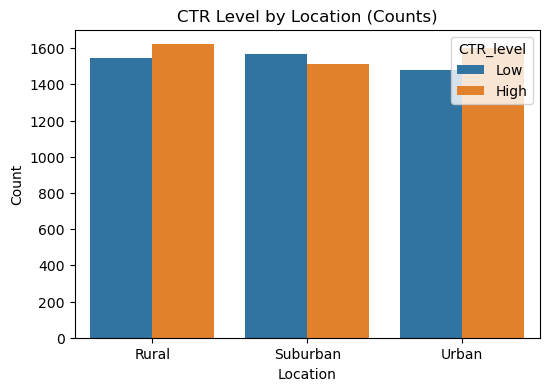

In [365]:
plt.figure(figsize=(6,4))
sns.barplot(data=df_melted, x='Location', y='Count', hue='CTR_level')
plt.title('CTR Level by Location (Counts)')
plt.ylabel('Count')
plt.show()

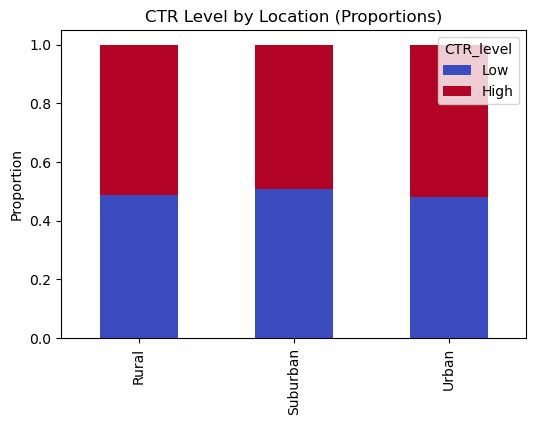

In [366]:
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
proportions.plot(kind='bar', stacked=True, figsize=(6,4), colormap='coolwarm')
plt.title('CTR Level by Location (Proportions)')
plt.ylabel('Proportion')
plt.legend(title='CTR_level')
plt.show()

#### Checking Normality Assumption.


In [338]:
Text_data = data[data['AD_TYPE'] == 'Text']['CTR']
Video_data = data[data['AD_TYPE'] == 'Video']['CTR']

# Shapiro-Wilk for male
stat_m, p_m = shapiro(Text_data)
print("Male:", stat_m, p_m)

# Shapiro-Wilk for female
stat_f, p_f = shapiro(Video_data)
print("Female:",stat_f,p_f)

Male: 0.9975008116862455 0.0008464891333636672
Female: 0.9975439907667606 0.0008411084624449714


normality is rejected , so let's consider non-parametric test  Mann–Whitney U

#### Mannwhitneyu

u_statistic, p_value = mannwhitneyu(Text_data,Video_data, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_statistic:.2f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between ctr of text and video data.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between ctr of text and video data.")

#### Chi square test 
* H0: No significant difference in CTR across topics of ads

In [339]:
contingency_table = pd.crosstab(data['AD_TOPIC'], data['CTR_level'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("Expected Frequencies:")
print(expected_df)
less_than_5 = (expected < 5).sum()
less_than_1 = (expected < 1).sum()
total_cells = expected.size
percent_less_than_5 = (less_than_5 / total_cells) * 100
print(f"\nCells with expected < 5: {less_than_5} ({percent_less_than_5:.2f}%)")
print(f"Cells with expected < 1: {less_than_1}")

if percent_less_than_5 > 20 or less_than_1 > 0:
    print("\nAssumptions NOT satisfied for Chi-square test.")
else:
    print("\nAssumptions satisfied for Chi-square test.")

Expected Frequencies:
CTR_level          Low        High
AD_TOPIC                          
Fashion     767.553960  791.446040
Finance     791.678491  816.321509
Food        760.661237  784.338763
Health      742.444754  765.555246
Technology  766.076948  789.923052
Travel      765.584610  789.415390

Cells with expected < 5: 0 (0.00%)
Cells with expected < 1: 0

Assumptions satisfied for Chi-square test.


In [340]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['AD_TOPIC'], data['CTR_level'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print(f"\nChi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

if p < 0.05:
    print("Significant difference in across CTR_level AD_TYPE  (reject H0)")
else:
    print("No significant difference in CTR_level AD_TYPE (fail to reject H0)")

Contingency Table:
 CTR_level   Low  High
AD_TOPIC             
Fashion     788   771
Finance     803   805
Food        732   813
Health      738   770
Technology  759   797
Travel      774   781

Chi2: 3.8824, p-value: 0.5665, dof: 5
No significant difference in CTR_level AD_TYPE (fail to reject H0)


#### Chi square test 
* H0: No significant difference in CTR across placements of ads

In [341]:
contingency_table = pd.crosstab(data['AD_PLACEMENT'], data['CTR_level'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
expected_df = pd.DataFrame(expected,
                           index=contingency_table.index,
                           columns=contingency_table.columns)

print("Expected Frequencies:")
print(expected_df)
less_than_5 = (expected < 5).sum()
less_than_1 = (expected < 1).sum()
total_cells = expected.size
percent_less_than_5 = (less_than_5 / total_cells) * 100
print(f"\nCells with expected < 5: {less_than_5} ({percent_less_than_5:.2f}%)")
print(f"Cells with expected < 1: {less_than_1}")

if percent_less_than_5 > 20 or less_than_1 > 0:
    print("\nAssumptions NOT satisfied for Chi-square test.")
else:
    print("\nAssumptions satisfied for Chi-square test.")

Expected Frequencies:
CTR_level              Low         High
AD_PLACEMENT                           
Search Engine  1529.692209  1577.307791
Social Media   1527.722859  1575.277141
Website        1536.584932  1584.415068

Cells with expected < 5: 0 (0.00%)
Cells with expected < 1: 0

Assumptions satisfied for Chi-square test.


In [342]:
contingency_table = pd.crosstab(data['AD_PLACEMENT'], data['CONVERSION_RATE_level'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:\n", contingency_table)
print(f"\nChi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")

if p < 0.05:
    print("Significant difference in across CONVERSION_RATE AD_PLACEMENT  (reject H0)")
else:
    print("No significant difference in CONVERSION_RATE AD_TYPE (fail to reject H0)")

Contingency Table:
 CONVERSION_RATE_level  Low  High
AD_PLACEMENT                    
Search Engine          210  2912
Social Media           213  2910
Website                233  2906

Chi2: 1.3758, p-value: 0.5026, dof: 2
No significant difference in CONVERSION_RATE AD_TYPE (fail to reject H0)


## A/B Testing of Multiple Interaction Metrics

* H0:  No significant difference in CONVERSION_RATE_level across different locations and ad topics

In [343]:

table = pd.crosstab(index=[data['LOCATION'], data['AD_TOPIC']], 
                    columns=data['CONVERSION_RATE_level'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 8.7779, p-value: 0.9470, dof: 17
fail to reject H0


* H0:  No significant difference in CTR_level across different locations and ad topics

In [344]:
table = pd.crosstab(index=[data['LOCATION'], data['AD_TOPIC']], 
                    columns=data['CTR_level'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 24.4186, p-value: 0.1085, dof: 17
fail to reject H0


* H0:  No significant difference in CTR_level across different locations and ad types

In [345]:
table = pd.crosstab(index=[data['LOCATION'], data['AD_TYPE']], 
                    columns=data['CTR_level'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 12.4356, p-value: 0.3318, dof: 11
fail to reject H0


* H0:  No significant difference in CONVERSION_RATE_level across different locations and ad types

In [346]:
table = pd.crosstab(index=[data['LOCATION'], data['AD_TYPE']], 
                    columns=data['CONVERSION_RATE_level'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 10.2635, p-value: 0.5069, dof: 11
fail to reject H0


* H0:  No significant difference in CONVERSION_RATE_level across different locations and ad placements

In [347]:
table = pd.crosstab(index=[data['LOCATION'], data['AD_PLACEMENT']], 
                    columns=data['CONVERSION_RATE_level'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 8.8435, p-value: 0.3557, dof: 8
fail to reject H0


* H0:  No significant difference in CTR_level across different locations and ad placements

In [348]:
table = pd.crosstab(index=[data['AD_PLACEMENT'], data['LOCATION']], 
                    columns=data['CTR_level'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 14.8629, p-value: 0.0619, dof: 8
fail to reject H0


In [349]:
n = table.to_numpy().sum()
min_dim = min(table.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V: {cramers_v:.4f}")

Cramér's V: 0.0399


* H0: No significant difference in CTR_level across different Income_class,Age_class and AD_PLACEMENT

In [350]:
table = pd.crosstab(index=[data['Income_class'],data['Age_class'],data['AD_PLACEMENT']], 
                    columns=data['CTR_level'])

chi2, p, dof, expected = chi2_contingency(table)
print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}, dof: {dof}")
if p < 0.05:
    print("reject H0")
else:
    print("fail to reject H0")

Chi2: 44.1301, p-value: 0.4661, dof: 44
fail to reject H0


In [367]:
data.to_csv("ads_clean_for_powerbi.csv", index=False)

In [369]:
data.to_csv(r"C:\Users\PC\Desktop\mediacomproject\ads_clean_for_powerbi.csv",index=False)

In [370]:
df_cluster

,Age_class,Income_class,GENDER_Female,GENDER_Male,LOCATION_Rural,LOCATION_Urban,cluster,CTR,CONVERSION_RATE,CTR_level,AD_TYPE,AD_TOPIC,AD_PLACEMENT
0,3,0,False,True,False,True,1,0.0737,0.0981,High,Banner,Travel,Social Media
1,2,1,False,True,True,False,0,0.0592,0.0937,High,Video,Travel,Search Engine
2,2,2,True,False,True,False,3,0.0563,0.1912,High,Text,Food,Social Media
3,3,2,True,False,False,False,3,0.0232,0.1122,Low,Text,Health,Website
4,3,0,False,True,False,True,1,0.0539,0.1426,High,Native,Fashion,Search Engine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9457,2,2,True,False,True,False,3,0.0443,0.0679,Low,Banner,Technology,Website
9458,2,1,False,True,False,True,1,0.0407,0.2664,Low,Native,Technology,Website
9459,2,1,False,True,False,False,1,0.0390,0.2354,Low,Text,Finance,Search Engine
9460,2,1,False,True,True,False,0,0.0455,0.1725,Low,Native,Technology,Social Media
